### Random Forrest Regressor

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

#### Baseline Prediction for Comparison
The baseline predictions take the mean value of training labels for all test data

In [30]:
up_or_down = 'down' # or down
all_data = pd.read_excel("../data/input_new.xlsx", sheet_name=up_or_down)
all_data = all_data.drop(index=[48, 49, 51, 72, 91], axis=0).reset_index(drop=True)  # remove outliers
Y = all_data["Ra_down"]
X = np.zeros((95, 20))  # dummy variable
X = np.array(X)
Y = np.array(Y)
x_train, x_test , y_train, y_test= train_test_split(X, Y,test_size=0.2, random_state=20, shuffle=True)

In [31]:
# The baseline predictions are the historical averages
baseline_preds = np.mean(y_train)

In [32]:
y_pred = []
for i in range(len(x_test)):
    y_pred.append(baseline_preds)  # prediction for all test data is the mean of training labels

In [33]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 8.11
Coefficient of determination: -0.00
MAE:2.19
mean absolute percentage error:0.36


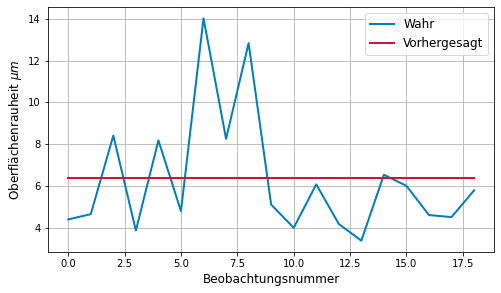

In [34]:
plt.figure(figsize=(16/2, 9/2))
plt.plot(y_test, label='Wahr', color=(0/255, 128/255, 180/255), lw=2)
plt.plot(y_pred, label='Vorhergesagt', color=(190/255, 30/255, 60/255), lw=2)
plt.grid()
plt.xlabel('Beobachtungsnummer', fontsize=12)
plt.ylabel(r'Oberflächenrauheit $\mu m$', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('../images/baseline_model.svg')

### Down Milling

#### Using Feature Set 1 - manually selected Features from Literature Review Feature Set

**Import Data**

In [35]:
up_or_down = 'down' # or down
all_data = pd.read_csv('../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
all_data = all_data.drop(index=[48, 49, 51, 72, 91], axis=0).reset_index(drop=True)  # remove outliers
all_data.head()

Nr.  spindle_speed   ap     fz   Ra_down   vbs   clamp_t1     clamp_t2  \
0    1           8000  0.2  0.050  12.83250   800  23.664093   917.580527   
1    2           8000  0.2  0.065   6.47625  1040  28.025455  1817.287671   
2    3           8000  0.2  0.075   8.42100  1200  24.258964  2600.600669   
3    4           8000  0.2  0.100   6.81600  1600  23.584906  4141.970983   
4    5           8000  0.4  0.050  12.51250   800  43.182927  1232.354156   

    clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  robot_t8  \
0  38.393060     131.0  ...    1159.0     340.0 -0.164626  3.279446  1.164723   
1  50.951992     153.0  ...    1114.0     286.0 -0.152276  2.869851  1.125636   
2  56.380290     175.0  ...    1205.0     350.0  0.195294  2.681590  1.214723   
3  68.429443     212.0  ...    1206.0     438.0 -0.022681  2.818957  1.221912   
4  55.606742     132.0  ...    1147.0     275.0  0.136498  2.464138  1.154345   

   robot_t9   clamp_f1   clamp_f2   robot_f1   robot_f2  
0  1.162811  12.222404  19.191919  22.863227  14.646465  
1  1.123908  17.382572  21.717172  25.495338  31.313131  
2  1.212308  20.770490  21.717172  37.602301  31.313131  
3  1.217963  27.491432  21.717172  39.944840   5.050505  
4  1.152213  18.159337   9.595960  33.502295   6.060606  

[5 rows x 28 columns]

##### All Features without Hyperparametertuning

In [36]:
used_feature = ['spindle_speed', 'ap', 'fz', 'vbs', 'clamp_t1',
       'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7',
       'clamp_t8', 'clamp_t9', 'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4',
       'robot_t5', 'robot_t6', 'robot_t7', 'robot_t8', 'robot_t9', 'clamp_f1',
       'clamp_f2', 'robot_f1', 'robot_f2']

In [37]:
X = all_data[used_feature]
X = np.array(X)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=20, shuffle=True)

In [38]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train);

In [39]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [40]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.11
Coefficient of determination: 0.97
MAE:0.25
mean absolute percentage error:0.04


**Testing Metrics**

In [41]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.52
Coefficient of determination: 0.94
MAE:0.50
mean absolute percentage error:0.07


**Fit to training data**

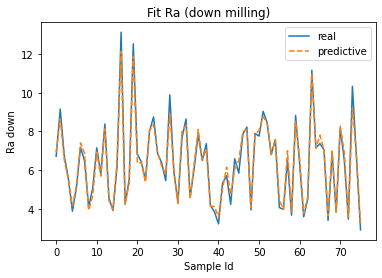

In [42]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label="real")
plt.plot(range(len(y_fit)), y_fit, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

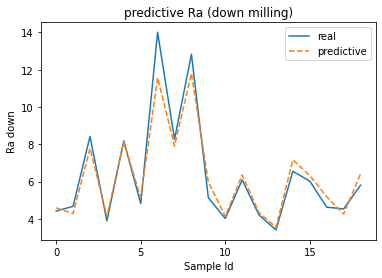

In [43]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label="real")
plt.plot(range(len(y_pred)), y_pred, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

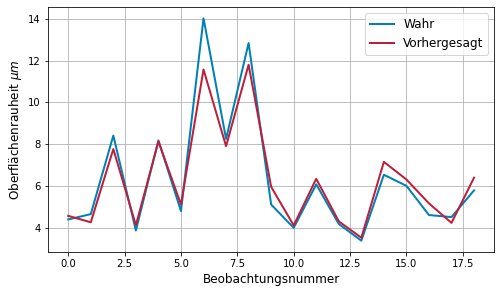

In [44]:
plt.figure( figsize=(16/2, 9/2))
plt.plot(y_test, label='Wahr', color=(0/255, 128/255, 180/255), lw=2)
plt.plot(y_pred, label='Vorhergesagt', color=(190/255, 30/255, 60/255), lw=2)
plt.grid()
plt.xlabel('Beobachtungsnummer', fontsize=12)
plt.ylabel(r'Oberflächenrauheit $\mu m$', fontsize=12)
plt.legend(fontsize=12)

plt.savefig('../images/RF1.svg')

In [45]:
df = pd.DataFrame({'Test': y_test, 'Pred': y_pred})
df

Test       Pred
0    4.42275   4.593568
1    4.67525   4.284943
2    8.42100   7.779369
3    3.89550   4.146872
4    8.19050   8.143751
5    4.82100   5.134164
6   14.01250  11.571800
7    8.26400   7.915462
8   12.83250  11.800228
9    5.13175   5.976807
10   4.02275   4.137527
11   6.09400   6.360370
12   4.20700   4.330217
13   3.40950   3.550820
14   6.55275   7.166596
15   6.02425   6.325468
16   4.63100   5.186566
17   4.53450   4.258778
18   5.80875   6.413249

In [46]:
df = df.sort_values('Test')
df

Test       Pred
13   3.40950   3.550820
3    3.89550   4.146872
10   4.02275   4.137527
12   4.20700   4.330217
0    4.42275   4.593568
17   4.53450   4.258778
16   4.63100   5.186566
1    4.67525   4.284943
5    4.82100   5.134164
9    5.13175   5.976807
18   5.80875   6.413249
15   6.02425   6.325468
11   6.09400   6.360370
14   6.55275   7.166596
4    8.19050   8.143751
7    8.26400   7.915462
2    8.42100   7.779369
8   12.83250  11.800228
6   14.01250  11.571800

In [47]:
z = max(abs(df['Pred'] - df['Test']))

In [48]:
z / df.loc[6, 'Test']*100

17.41801962533466

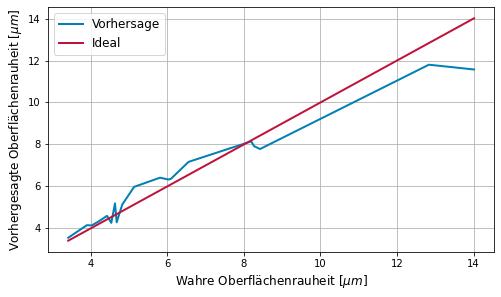

In [49]:
plt.figure(figsize=(16/2, 9/2))
plt.plot(df['Test'].values, df['Pred'].values, label='Vorhersage', color=(0/255, 128/255, 180/255), lw=2)
plt.plot(np.linspace(3.4095, 14.0125, endpoint=True), np.linspace(3.4095, 14.0125, endpoint=True), label='Ideal', color=(190/255, 20/255, 60/255), lw=2)
plt.grid()
plt.legend(fontsize=12)
plt.xlabel(r'Wahre Oberflächenrauheit $[\mu m]$', fontsize=12)
plt.ylabel(r'Vorhergesagte Oberflächenrauheit $[\mu m]$', fontsize=12)
plt.savefig('../images/RF2.svg')

Text(0, 0.5, 'Vorhergesagte Oberflächenrauheit $[\\mu m]$')

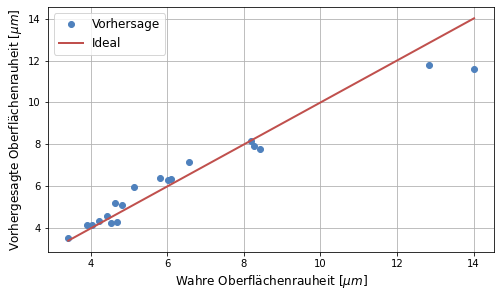

In [50]:
plt.figure(figsize=(16/2, 9/2))
plt.plot(df['Test'].values, df['Pred'].values, 'o', label='Vorhersage', color=(79/255, 129/255, 189/255), lw=2)
plt.plot(np.linspace(3.4095, 14.0125, endpoint=True), np.linspace(3.4095, 14.0125, endpoint=True), label='Ideal', color=(192/255, 80/255, 77/255), lw=2)
plt.grid()
plt.legend(fontsize=12)
plt.xlabel(r'Wahre Oberflächenrauheit $[\mu m]$', fontsize=12)
plt.ylabel(r'Vorhergesagte Oberflächenrauheit $[\mu m]$', fontsize=12)

In [62]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [63]:
all_data

Nr.  spindle_speed   ap     fz   Ra_down   vbs   clamp_t1       clamp_t2  \
0     1           8000  0.2  0.050  12.83250   800  23.664093     917.580527   
1     2           8000  0.2  0.065   6.47625  1040  28.025455    1817.287671   
2     3           8000  0.2  0.075   8.42100  1200  24.258964    2600.600669   
3     4           8000  0.2  0.100   6.81600  1600  23.584906    4141.970983   
4     5           8000  0.4  0.050  12.51250   800  43.182927    1232.354156   
..  ...            ...  ...    ...       ...   ...        ...            ...   
90   96          16000  0.8  0.100   2.92575  3200  32.663636  126860.571274   
91   97          16000  1.0  0.050   6.09400  1600  16.813433   51788.152328   
92   98          16000  1.0  0.065   4.09975  2080  27.814126   85863.219053   
93   99          16000  1.0  0.075   3.23825  2400  17.141361   95383.532543   
94  100          16000  1.0  0.100   3.47700  3200  56.746269  131887.060299   

      clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  \
0    38.393060     131.0  ...    1159.0     340.0 -0.164626  3.279446   
1    50.951992     153.0  ...    1114.0     286.0 -0.152276  2.869851   
2    56.380290     175.0  ...    1205.0     350.0  0.195294  2.681590   
3    68.429443     212.0  ...    1206.0     438.0 -0.022681  2.818957   
4    55.606742     132.0  ...    1147.0     275.0  0.136498  2.464138   
..         ...       ...  ...       ...       ...       ...       ...   
90  356.862502     607.0  ...    1466.0     965.0  0.074937  2.450916   
91  227.766557     382.0  ...    1387.0     802.0 -0.135212  2.042409   
92  293.798656     524.0  ...    1447.0     918.0 -0.046218  2.144651   
93  308.509268     455.0  ...    1411.0     872.0 -0.158009  2.660414   
94  366.675667     590.0  ...    1550.0    1148.0 -0.217817  2.358557   

    robot_t8  robot_t9    clamp_f1   clamp_f2    robot_f1   robot_f2  
0   1.164723  1.162811   12.222404  19.191919   22.863227  14.646465  
1   1.125636  1.123908   17.382572  21.717172   25.495338  31.313131  
2   1.214723  1.212308   20.770490  21.717172   37.602301  31.313131  
3   1.221912  1.217963   27.491432  21.717172   39.944840   5.050505  
4   1.154345  1.152213   18.159337   9.595960   33.502295   6.060606  
..       ...       ...         ...        ...         ...        ...  
90  1.481595  1.447160  243.671946  21.212121   76.110895  40.909091  
91  1.401067  1.376350  146.029390  21.212121   83.654707  40.909091  
92  1.457688  1.424433  218.904376  21.212121  100.091163  38.383838  
93  1.428614  1.402853  263.678931   0.505051   90.098039  40.909091  
94  1.566924  1.513719  231.174047  21.212121   79.552251  40.909091  

[95 rows x 28 columns]

In [64]:
feature_names = all_data.drop(columns=["Nr.", "Ra_down"]).columns
feature_names

Index(['spindle_speed', 'ap', 'fz', 'vbs', 'clamp_t1', 'clamp_t2', 'clamp_t3',
       'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7', 'clamp_t8', 'clamp_t9',
       'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4', 'robot_t5', 'robot_t6',
       'robot_t7', 'robot_t8', 'robot_t9', 'clamp_f1', 'clamp_f2', 'robot_f1',
       'robot_f2'],
      dtype='object')

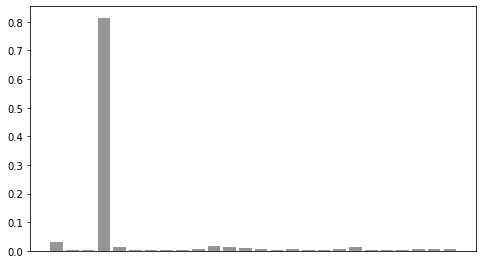

In [66]:
fig, ax = plt.subplots(figsize=(16/2, 9/2))
ax.bar(feature_names, importances, color=(150/255, 150/255, 150/255))
ax.tick_params(axis='x', colors='white')
plt.savefig('../images/Feature-Importance2.svg')

##### All Features with Hyperparametertuning

In [101]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [102]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [103]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110}

In [498]:
rf = RandomForestRegressor(n_estimators=100, max_depth=110, min_samples_leaf=1, max_features='auto', min_samples_split=9, random_state=20)
rf.fit(x_train, y_train);

In [499]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

In [500]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.72
Coefficient of determination: 0.91
MAE:0.56
mean absolute percentage error:0.08


No improvement over default model

**Feature Importance Analysis**

In [501]:
feature_list = used_feature

In [502]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: vbs                  Importance: 0.84
Variable: spindle_speed        Importance: 0.03
Variable: clamp_t1             Importance: 0.02
Variable: clamp_t7             Importance: 0.02
Variable: clamp_t6             Importance: 0.01
Variable: clamp_t8             Importance: 0.01
Variable: clamp_t9             Importance: 0.01
Variable: robot_t7             Importance: 0.01
Variable: robot_f1             Importance: 0.01
Variable: robot_f2             Importance: 0.01
Variable: ap                   Importance: 0.0
Variable: fz                   Importance: 0.0
Variable: clamp_t2             Importance: 0.0
Variable: clamp_t3             Importance: 0.0
Variable: clamp_t4             Importance: 0.0
Variable: clamp_t5             Importance: 0.0
Variable: robot_t1             Importance: 0.0
Variable: robot_t2             Importance: 0.0
Variable: robot_t3             Importance: 0.0
Variable: robot_t4             Importance: 0.0
Variable: robot_t5             Importance: 0.0
Var

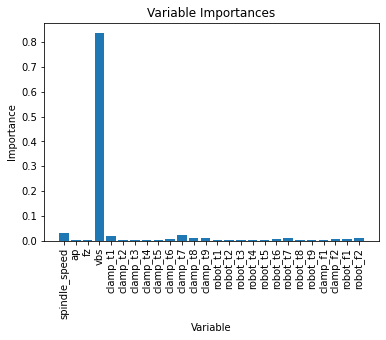

In [503]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

It seems that the RF-model almost only uses the vbs-feature. Therefore, a prediction only using VBS is implemented.

##### Using only vbs without Hyperparametertuning

In [504]:
X = all_data['vbs']
X = np.array(X)
X = X.reshape(-1, 1)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [505]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train);

In [506]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [ ]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

**Test Metrics**

In [508]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.48
Coefficient of determination: 0.94
MAE:0.50
mean absolute percentage error:0.08


**Fit to training data**

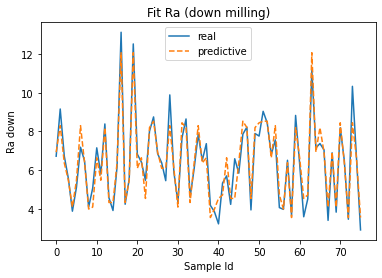

In [509]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer = True)

# plt.figure(figsize = (5, 5))
# sns.set(font_scale = 0.1)
plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

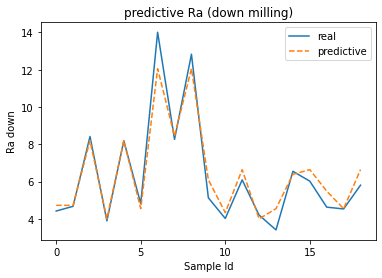

In [510]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

##### Using only vbs with Hyperparametertuning

In [511]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [512]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [513]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [514]:
rf = RandomForestRegressor(n_estimators=500, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=20)
rf.fit(x_train, y_train);

In [515]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

In [516]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.48
Coefficient of determination: 0.94
MAE:0.50
mean absolute percentage error:0.08


Best result only using VBS

##### Using only vibrational Features without Hyperparameter Tuning

In [517]:
used_feature = [#'spindle_speed', 'ap', 'fz','vbs', 
       'clamp_t1', 'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7', 'clamp_t8', 'clamp_t9',
       'clamp_f1', 'clamp_f2',
       'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4', 'robot_t5', 'robot_t6', 'robot_t7', 'robot_t8', 'robot_t9',
       'robot_f1', 'robot_f2']

In [518]:
X = all_data[used_feature]
X = np.array(X)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test= train_test_split(X, Y,test_size = 0.2, random_state=20, shuffle=True)

In [519]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train);

In [520]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [521]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.58
Coefficient of determination: 0.87
MAE:0.58
mean absolute percentage error:0.10


**Testing Metrics**

In [522]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 4.58
Coefficient of determination: 0.43
MAE:1.64
mean absolute percentage error:0.25


**Fit to training data**

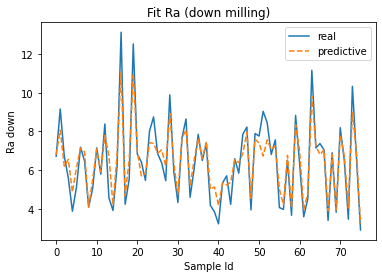

In [523]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer = True)

# plt.figure(figsize = (5, 5))
# sns.set(font_scale = 0.1)
plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

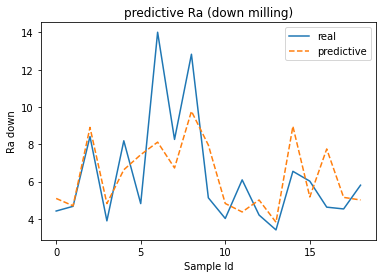

In [524]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

##### Using only vibrational Features with Hyperparameter Tuning

In [525]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [526]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [527]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 60}

In [528]:
rf = RandomForestRegressor(n_estimators=100, max_depth=60, min_samples_leaf=4, max_features='sqrt', min_samples_split=7, random_state=20)
rf.fit(x_train, y_train);

In [529]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Testing Metrics**

In [530]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 5.22
Coefficient of determination: 0.35
MAE:1.69
mean absolute percentage error:0.26


No improvement

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

#### Using Feature Set 2 - PCA on all Features from Literature Review

In [ ]:
test_data.drop?

In [33]:
train_data = pd.read_csv("../data/feature_set2/down_train_data.csv")
train_data = train_data.drop(columns=["Unnamed: 0"])
test_data = pd.read_csv("../data/feature_set2/down_test_data.csv")
test_data = test_data.drop(columns=["Unnamed: 0"])

##### All Features without Hyperparametertuning

In [34]:
x_train = train_data.drop(columns=["Ra_down"])
x_test = test_data.drop(columns=["Ra_down"])
y_train = train_data["Ra_down"].values
y_test = test_data["Ra_down"].values

In [35]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=20)

In [36]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [37]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.14
Coefficient of determination: 0.97
MAE:0.26
mean absolute percentage error:0.04


**Testing Metrics**

In [38]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.97
Coefficient of determination: 0.88
MAE:0.67
mean absolute percentage error:0.09


**Fit to training data**

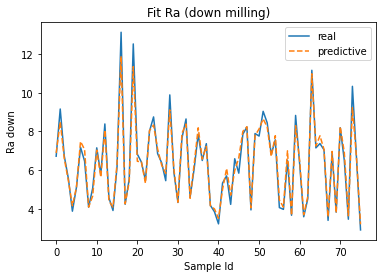

In [39]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer = True)

# plt.figure(figsize = (5, 5))
# sns.set(font_scale = 0.1)
plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

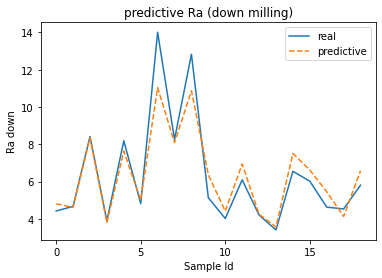

In [40]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

##### All Features with Hyperparametertuning

In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [42]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [43]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100}

In [44]:
rf = RandomForestRegressor(n_estimators=300, max_depth=100, min_samples_leaf=1, max_features='auto', min_samples_split=9, random_state=20)
rf.fit(x_train, y_train);

In [45]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Testing Metrics**

In [46]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 1.13
Coefficient of determination: 0.86
MAE:0.71
mean absolute percentage error:0.10


No improvement over default model

##### Using only vibrational Features without Hyperparameter Tuning

In [47]:
x_train = train_data.drop(columns=["Ra_down", "vbs", "ap", "fz", "spindle_speed"])
x_test = test_data.drop(columns=["Ra_down", "vbs", "ap", "fz", "spindle_speed"])
y_train = train_data["Ra_down"].values
y_test = test_data["Ra_down"].values

In [48]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=20)

In [49]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Testing Metrics**

In [50]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 4.92
Coefficient of determination: 0.39
MAE:1.57
mean absolute percentage error:0.24


##### Using only vibrational Features with Hyperparameter Tuning

In [51]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [52]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [53]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100}

In [54]:
rf = RandomForestRegressor(n_estimators=300, max_depth=100, min_samples_leaf=1, max_features='auto', min_samples_split=9, random_state=20)
rf.fit(x_train, y_train);

In [55]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [56]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.91
Coefficient of determination: 0.80
MAE:0.71
mean absolute percentage error:0.12


**Testing Metrics**

In [57]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 5.08
Coefficient of determination: 0.37
MAE:1.58
mean absolute percentage error:0.24


**Fit to training data**

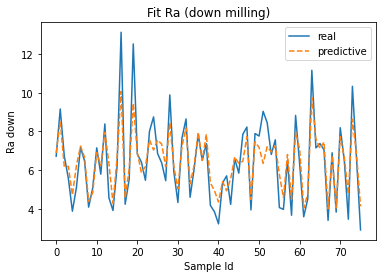

In [58]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer = True)

# plt.figure(figsize = (5, 5))
# sns.set(font_scale = 0.1)
plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

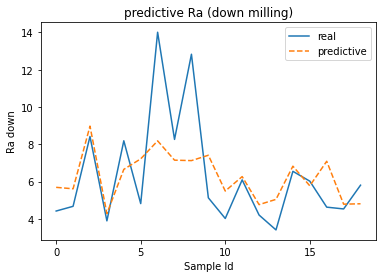

In [59]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

#### Using Feature Set 3 - tsfresh and tsfresh feature selector

In [4]:
train_data = pd.read_csv("../data/feature_set3/down_train_data.csv")
test_data = pd.read_csv("../data/feature_set3/down_test_data.csv")

##### All Features without Hyperparametertuning

In [23]:
x_train = train_data.drop(columns=["Ra_down", "Unnamed: 0"])
y_train = train_data["Ra_down"]
x_test = test_data.drop(columns=["Ra_down", "Unnamed: 0"])
y_test = test_data["Ra_down"]

In [24]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=20)

In [25]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [26]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.11
Coefficient of determination: 0.98
MAE:0.25
mean absolute percentage error:0.04


**Testing Metrics**

In [27]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.88
Coefficient of determination: 0.89
MAE:0.67
mean absolute percentage error:0.10


**Fit to training data**

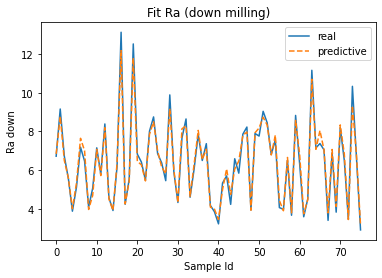

In [28]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer = True)

# plt.figure(figsize = (5, 5))
# sns.set(font_scale = 0.1)
plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

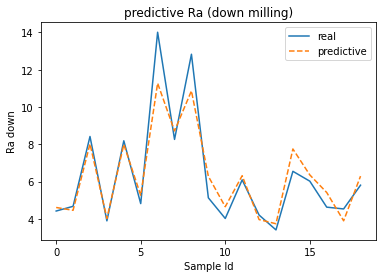

In [29]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

##### All Features with Hyperparametertuning

In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [31]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [32]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [33]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=20, min_samples_leaf=1, max_features='auto', min_samples_split=3, random_state=20)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=3, n_estimators=1000,
                      random_state=20)

In [34]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Test Metrics**

In [35]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.88
Coefficient of determination: 0.89
MAE:0.67
mean absolute percentage error:0.10


##### Using only vibrational Features without Hyperparameter Tuning

In [5]:
x_train = train_data.drop(columns=["Ra_down", "Unnamed: 0", "spindle_speed", "vbs", "fz", "ap"])
y_train = train_data["Ra_down"]
x_test = test_data.drop(columns=["Ra_down", "Unnamed: 0", "spindle_speed", "vbs", "fz", "ap"])
y_test = test_data["Ra_down"]

In [6]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=20)

In [7]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Testing Metrics**

In [8]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 5.81
Coefficient of determination: 0.28
MAE:1.81
mean absolute percentage error:0.29


##### Using only vibrational Features with Hyperparameter Tuning

In [9]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [10]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [11]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100}

In [12]:
rf = RandomForestRegressor(n_estimators=200, max_depth=100, min_samples_leaf=4, max_features='auto', min_samples_split=6, random_state=20)
rf.fit(x_train, y_train);

In [13]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [14]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.99
Coefficient of determination: 0.78
MAE:0.71
mean absolute percentage error:0.12


**Testing Metrics**

In [15]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 5.73
Coefficient of determination: 0.29
MAE:1.75
mean absolute percentage error:0.27


**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

### Up Milling

#### Baseline Prediction for Comparison
The baseline predictions take the mean value of training labels for all test data

In [586]:
up_or_down = 'up' # or down
all_data = pd.read_excel("../data/input_new.xlsx", sheet_name=up_or_down)
all_data = all_data.drop(index=[48, 49, 51, 72, 91], axis=0).reset_index(drop=True)  # remove outliers
Y = all_data["Ra_up"]
X = np.zeros((95, 20))  # dummy variable
X = np.array(X)
Y = np.array(Y)
x_train, x_test , y_train, y_test= train_test_split(X, Y,test_size=0.2, random_state=20, shuffle=True)

In [587]:
# The baseline predictions are the historical averages
baseline_preds = np.mean(y_train)

In [588]:
y_pred = []
for i in range(len(x_test)):
    y_pred.append(baseline_preds)  # prediction for all test data is the mean of training labels

In [589]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 8.34
Coefficient of determination: -0.00
MAE:2.36
mean absolute percentage error:0.37


#### Using Feature Set 1 - manually selected Features from Literature Review Feature Set

**Import Data**

In [104]:
up_or_down = 'up' # or down
all_data = pd.read_csv('../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
all_data = all_data.drop(index=[48, 49, 51, 72, 91], axis=0).reset_index(drop=True)  # remove outliers
all_data.head()

Nr.  spindle_speed   ap     fz     Ra_up   vbs   clamp_t1     clamp_t2  \
0    1           8000  0.2  0.050  12.90500   800  26.229323  1295.769854   
1    2           8000  0.2  0.065   6.78175  1040  29.329545   994.685664   
2    3           8000  0.2  0.075   8.43450  1200  22.787313  1504.542610   
3    4           8000  0.2  0.100   6.77025  1600  28.397163  2118.802554   
4    5           8000  0.4  0.050  12.54250   800  43.666667   824.102151   

    clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  robot_t8  \
0  44.484558     155.0  ...    1210.0     384.0  0.295203  2.858728  1.223420   
1  43.024878     128.0  ...    1221.0     454.0  0.129026  2.502421  1.249903   
2  44.924273     151.0  ...    1246.0     474.0  0.202293  2.518253  1.249318   
3  54.015627     169.0  ...    1278.0     614.0  0.179430  2.414027  1.287632   
4  52.226146     126.0  ...    1128.0     311.0  0.169912  3.404943  1.141053   

   robot_t9   clamp_f1   clamp_f2   robot_f1  robot_f2  
0  1.219488  17.582900  21.717172  51.978762  5.050505  
1  1.244343  15.763967  21.717172  45.485476  4.545455  
2  1.243240  20.080109  21.717172  63.985078  5.050505  
3  1.278015  20.092329  21.717172  84.466924  5.050505  
4  1.139565  13.043699   9.595960  32.618295  6.060606  

[5 rows x 28 columns]

##### All Features without Hyperparametertuning

In [591]:
used_feature = ['spindle_speed', 'ap', 'fz', 'vbs', 'clamp_t1',
       'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7',
       'clamp_t8', 'clamp_t9', 'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4',
       'robot_t5', 'robot_t6', 'robot_t7', 'robot_t8', 'robot_t9', 'clamp_f1',
       'clamp_f2', 'robot_f1', 'robot_f2']

In [592]:
X = all_data[used_feature]
X = np.array(X)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=20, shuffle=True)

In [593]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train);

In [594]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [595]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.09
Coefficient of determination: 0.98
MAE:0.23
mean absolute percentage error:0.04


**Testing Metrics**

In [596]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 1.14
Coefficient of determination: 0.86
MAE:0.84
mean absolute percentage error:0.13


**Fit to training data**

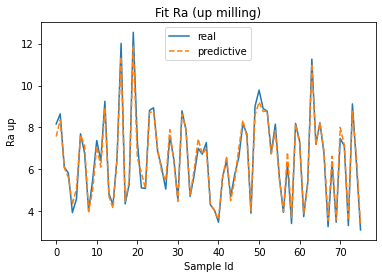

In [597]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label="real")
plt.plot(range(len(y_fit)), y_fit, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

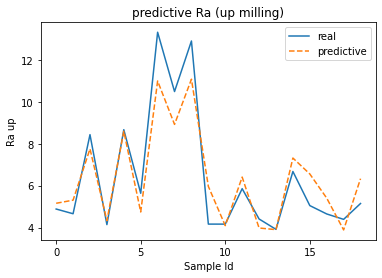

In [598]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label="real")
plt.plot(range(len(y_pred)), y_pred, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

##### All Features with Hyperparametertuning

In [599]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [600]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [601]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90}

In [602]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=90, min_samples_leaf=1, max_features='auto', min_samples_split=5, random_state=20)
rf.fit(x_train, y_train);

In [603]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

In [604]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 1.14
Coefficient of determination: 0.86
MAE:0.85
mean absolute percentage error:0.13


No improvement over default model

##### Using only vbs without Hyperparametertuning

In [605]:
X = all_data['vbs']
X = np.array(X)
X = X.reshape(-1, 1)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [606]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train);

In [607]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [608]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.36
Coefficient of determination: 0.91
MAE:0.48
mean absolute percentage error:0.08


**Test Metrics**

In [609]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 1.07
Coefficient of determination: 0.87
MAE:0.83
mean absolute percentage error:0.14


**Fit to training data**

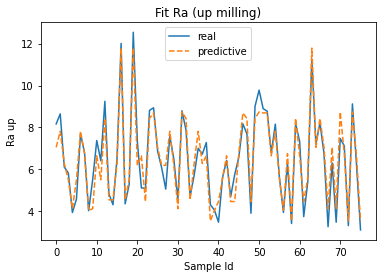

In [610]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer = True)

# plt.figure(figsize = (5, 5))
# sns.set(font_scale = 0.1)
plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

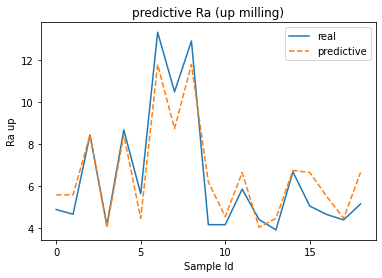

In [611]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

##### Using only vbs with Hyperparametertuning

In [612]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [613]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [614]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [615]:
rf = RandomForestRegressor(n_estimators=500, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=20)
rf.fit(x_train, y_train);

In [616]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

In [617]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 1.07
Coefficient of determination: 0.87
MAE:0.83
mean absolute percentage error:0.14


Best result only using VBS

##### Using only vibrational Features without Hyperparameter Tuning

In [105]:
used_feature = [#'spindle_speed', 'ap', 'fz','vbs', 
       'clamp_t1', 'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7', 'clamp_t8', 'clamp_t9',
       'clamp_f1', 'clamp_f2',
       'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4', 'robot_t5', 'robot_t6', 'robot_t7', 'robot_t8', 'robot_t9',
       'robot_f1', 'robot_f2']

In [106]:
X = all_data[used_feature]
X = np.array(X)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test= train_test_split(X, Y,test_size = 0.2, random_state=20, shuffle=True)

In [107]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train);

In [108]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [109]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.56
Coefficient of determination: 0.87
MAE:0.57
mean absolute percentage error:0.09


**Testing Metrics**

In [110]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 4.99
Coefficient of determination: 0.40
MAE:1.54
mean absolute percentage error:0.22


**Fit to training data**

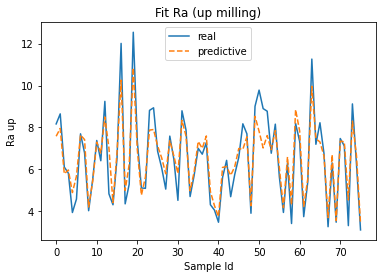

In [111]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer = True)

# plt.figure(figsize = (5, 5))
# sns.set(font_scale = 0.1)
plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

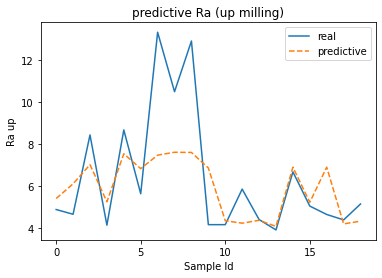

In [112]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

##### Using only vibrational Features with Hyperparameter Tuning

In [113]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [114]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [115]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40}

In [116]:
rf = RandomForestRegressor(n_estimators=100, max_depth=40, min_samples_leaf=4, max_features='auto', min_samples_split=4, random_state=20)
rf.fit(x_train, y_train);

In [117]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Testing Metrics**

In [118]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 5.41
Coefficient of determination: 0.35
MAE:1.58
mean absolute percentage error:0.22


No improvement

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

#### Using Feature Set 2 - PCA on all Features from Literature Review

In [60]:
train_data = pd.read_csv("../data/feature_set2/up_train_data.csv")
train_data = train_data.drop(columns=["Unnamed: 0"])
test_data = pd.read_csv("../data/feature_set2/up_test_data.csv")
test_data = test_data.drop(columns=["Unnamed: 0"])

##### All Features without Hyperparametertuning

In [61]:
x_train = train_data.drop(columns=["Ra_up"])
x_test = test_data.drop(columns=["Ra_up"])
y_train = train_data["Ra_up"].values
y_test = test_data["Ra_up"].values

In [62]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=20)

In [63]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [64]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.11
Coefficient of determination: 0.97
MAE:0.25
mean absolute percentage error:0.04


**Testing Metrics**

In [65]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 1.53
Coefficient of determination: 0.82
MAE:1.00
mean absolute percentage error:0.16


**Fit to training data**

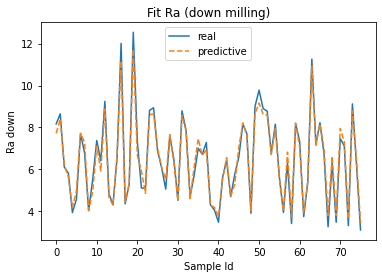

In [66]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer = True)

# plt.figure(figsize = (5, 5))
# sns.set(font_scale = 0.1)
plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

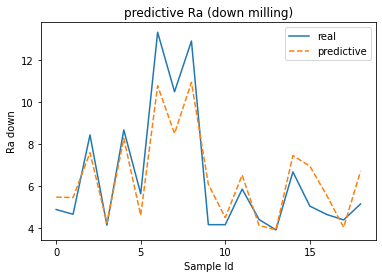

In [67]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

##### All Features with Hyperparametertuning

In [68]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [69]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [70]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [71]:
rf = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=1, max_features='auto', min_samples_split=8, random_state=20)
rf.fit(x_train, y_train);

In [72]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Testing Metrics**

In [73]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 1.55
Coefficient of determination: 0.81
MAE:0.99
mean absolute percentage error:0.15


##### Using only vibrational Features without Hyperparameter Tuning

In [74]:
x_train = train_data.drop(columns=["Ra_up", "vbs", "ap", "fz", "spindle_speed"])
x_test = test_data.drop(columns=["Ra_up", "vbs", "ap", "fz", "spindle_speed"])
y_train = train_data["Ra_up"].values
y_test = test_data["Ra_up"].values

In [75]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=20)

In [76]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Testing Metrics**

In [77]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 5.36
Coefficient of determination: 0.36
MAE:1.78
mean absolute percentage error:0.28


##### Using only vibrational Features with Hyperparameter Tuning

In [78]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [79]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [80]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40}

In [81]:
rf = RandomForestRegressor(n_estimators=800, max_depth=40, min_samples_leaf=4, max_features='auto', min_samples_split=7, random_state=20)
rf.fit(x_train, y_train);

In [82]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [83]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.91
Coefficient of determination: 0.78
MAE:0.71
mean absolute percentage error:0.12


**Testing Metrics**

In [84]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 5.24
Coefficient of determination: 0.37
MAE:1.72
mean absolute percentage error:0.26


**Fit to training data**

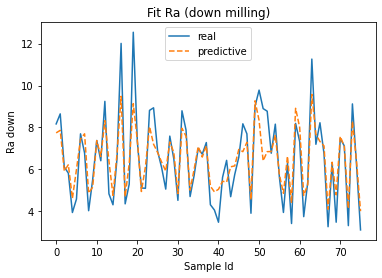

In [85]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer = True)

# plt.figure(figsize = (5, 5))
# sns.set(font_scale = 0.1)
plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

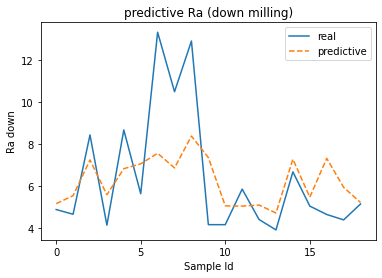

In [86]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

#### Using Feature Set 3 - tsfresh and tsfresh feature selector

In [16]:
train_data = pd.read_csv("../data/feature_set3/up_train_data.csv")
test_data = pd.read_csv("../data/feature_set3/up_test_data.csv")

##### All Features without Hyperparametertuning

In [17]:
x_train = train_data.drop(columns=["Ra_up", "Unnamed: 0"])
y_train = train_data["Ra_up"]
x_test = test_data.drop(columns=["Ra_up", "Unnamed: 0"])
y_test = test_data["Ra_up"]

In [18]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=20)

In [19]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [20]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.09
Coefficient of determination: 0.98
MAE:0.23
mean absolute percentage error:0.04


**Testing Metrics**

In [21]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 1.09
Coefficient of determination: 0.87
MAE:0.85
mean absolute percentage error:0.14


**Fit to training data**

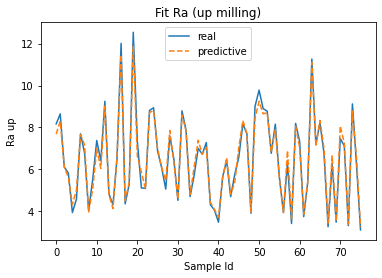

In [24]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer = True)

# plt.figure(figsize = (5, 5))
# sns.set(font_scale = 0.1)
plt.plot(range(len(y_train)), y_train, label = "real")
plt.plot(range(len(y_fit)), y_fit, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

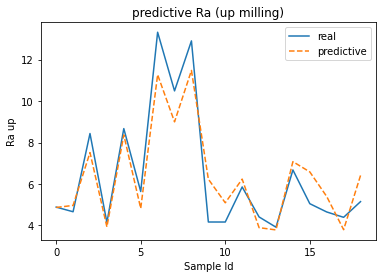

In [25]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label = "real")
plt.plot(range(len(y_pred)), y_pred, label = "predictive", linestyle = "--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

##### All Features with Hyperparametertuning

In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [27]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [28]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [29]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=20, min_samples_leaf=2, max_features='auto', min_samples_split=2, random_state=20)
rf.fit(x_train, y_train);

In [30]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Test Metrics**

In [31]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 1.22
Coefficient of determination: 0.85
MAE:0.88
mean absolute percentage error:0.14


##### Using only vibrational Features without Hyperparameter Tuning

In [32]:
x_train = train_data.drop(columns=["Ra_up", "Unnamed: 0", "fz", "vbs", "ap", "spindle_speed"])
y_train = train_data["Ra_up"]
x_test = test_data.drop(columns=["Ra_up", "Unnamed: 0", "fz", "vbs", "ap", "spindle_speed"])
y_test = test_data["Ra_up"]

In [33]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=20)

In [34]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Testing Metrics**

In [35]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 5.61
Coefficient of determination: 0.33
MAE:1.69
mean absolute percentage error:0.25


##### Using only vibrational Features with Hyperparameter Tuning

In [36]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

param_distribution = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 
                     'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(random_state=20)
rf_random = RandomizedSearchCV(rf, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [37]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=20, scoring='neg_mean_absolute_error')

In [38]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [39]:
rf = RandomForestRegressor(n_estimators=800, max_depth=20, min_samples_leaf=2, max_features='auto', min_samples_split=10, random_state=20)
rf.fit(x_train, y_train);

In [40]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [41]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 1.11
Coefficient of determination: 0.74
MAE:0.79
mean absolute percentage error:0.13


**Testing Metrics**

In [42]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 4.91
Coefficient of determination: 0.41
MAE:1.60
mean absolute percentage error:0.23


**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**